# Imports

In [ ]:
!pip install pyxlsb
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

`Read the datase`

In [ ]:
import pandas as pd
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/Virtual/stcSet_T2.xlsb')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(10)

,Unnamed: 0,date_,Total_watch_time_in_houres
0,0,2018-01-01,1123.551944
1,1,2018-01-02,1000.129722
2,2,2018-01-03,881.924444
3,3,2018-01-04,782.669444
4,4,2018-01-05,1051.939444
5,5,2018-01-08,841.178333
6,6,2018-01-09,873.495000
7,7,2018-01-10,970.475000
8,8,2018-01-11,721.381944
9,9,2018-01-12,772.675000


### **Display the dataset**



`Columns`

In [ ]:
print(df.columns)
df.head(10)
# filtered_df = df[df['month'] == 3]
# print(filtered_df)

import pandas as pd

# Load the time series data into a DataFrame

# Convert the date column to a datetime data type
df['date_'] = pd.to_datetime(df['date_'])



Index(['Unnamed: 0', 'date_', 'Total_watch_time_in_houres'], dtype='object')


In [ ]:
df

,Unnamed: 0,Total_watch_time_in_houres
date_,,
2018-01-01,0,1123.551944
2018-01-02,1,1000.129722
2018-01-03,2,881.924444
2018-01-04,3,782.669444
2018-01-05,4,1051.939444
...,...,...
2018-04-24,81,652.625278
2018-04-25,82,650.428889
2018-04-26,83,675.184444


`Number of rows`

In [ ]:
df.count()

Unnamed: 0                    86
date_                         86
Total_watch_time_in_houres    86
dtype: int64

`Each column datatybe`

In [ ]:
print((df.dtypes))


Unnamed: 0                             int64
date_                         datetime64[ns]
Total_watch_time_in_houres           float64
dtype: object


`Data describtion mean and standard deviation (max and min) values`

In [ ]:
print( display(df.describe()))

,Unnamed: 0,Total_watch_time_in_houres
count,86.000000,86.000000
mean,42.500000,780.817926
std,24.969982,122.992002
min,0.000000,562.124722
25%,21.250000,707.709653
50%,42.500000,763.181389
75%,63.750000,840.985278
max,85.000000,1123.551944


None


`Check duplication`

In [ ]:
df.duplicated().sum()

0

### **Visualize the dataset**

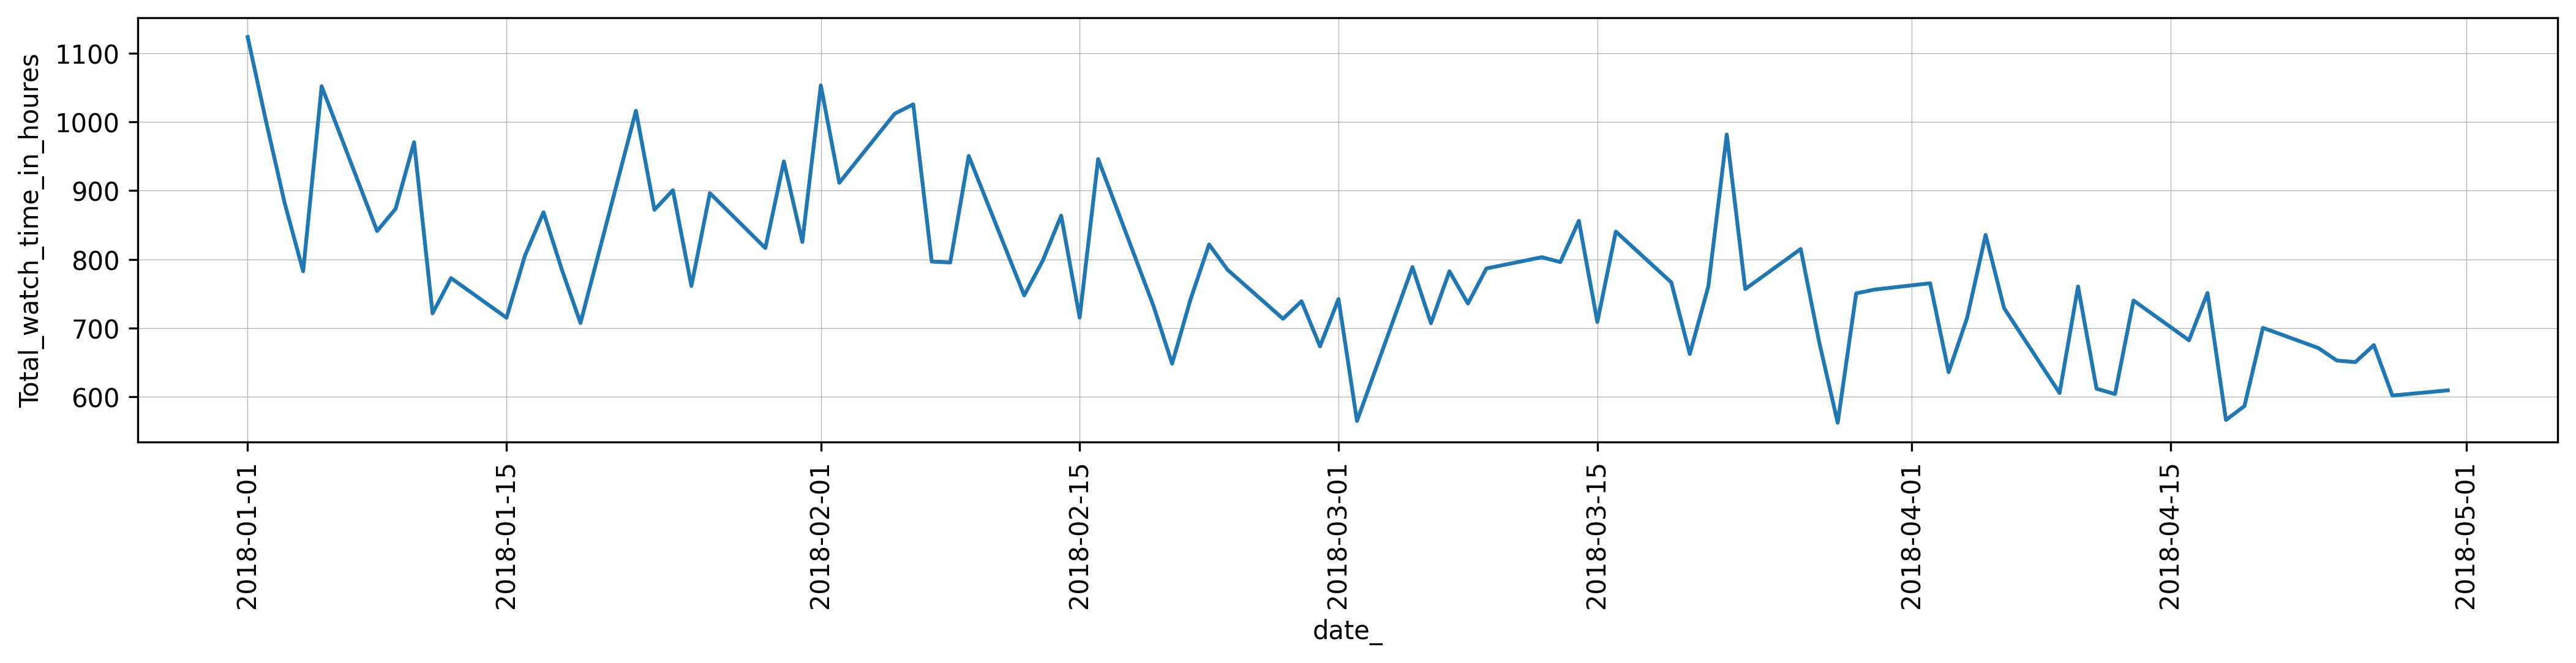

In [ ]:
plt.rcParams.update({'figure.figsize':(17,3), 'figure.dpi':300})
fig, ax=plt.subplots()
sns.lineplot(data=df, x='date_', y='Total_watch_time_in_houres')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)


In [ ]:
df[['date_']]

,date_
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
81,2018-04-24
82,2018-04-25
83,2018-04-26
84,2018-04-27


### **Formatting the dataset**

In [ ]:
# this step to make the model later become able to discover the pattern of
import datetime
df['month'] = df['date_'].dt.month
df['year'] = df['date_'].dt.year
df['day'] = df['date_'].dt.day

df['is_weekend'] = df['date_'].dt.weekday
def get_season(month):
    if month in [12, 1, 2]:
        return 1
    elif month in [3, 4, 5]:
        return 2
    elif month in [6, 7, 8]:
        return 3
    else:
        return 4

df['season'] = df['month'].apply(get_season)

df.head(10)

,Unnamed: 0,date_,Total_watch_time_in_houres,month,year,day,is_weekend,season
0,0,2018-01-01,1123.551944,1,2018,1,0,1
1,1,2018-01-02,1000.129722,1,2018,2,1,1
2,2,2018-01-03,881.924444,1,2018,3,2,1
3,3,2018-01-04,782.669444,1,2018,4,3,1
4,4,2018-01-05,1051.939444,1,2018,5,4,1
5,5,2018-01-08,841.178333,1,2018,8,0,1
6,6,2018-01-09,873.495000,1,2018,9,1,1
7,7,2018-01-10,970.475000,1,2018,10,2,1
8,8,2018-01-11,721.381944,1,2018,11,3,1
9,9,2018-01-12,772.675000,1,2018,12,4,1


### **Building The XGBRegressor model**

`Split the data`

In [ ]:
x= df[['month', 'year','day','season']] #Specify the class
y= df['Total_watch_time_in_houres'] #Specify the feature
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 72)
x_test_base=X_test



`Preprocessing the data`

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


`build, train and test the model`

In [ ]:
model = XGBRegressor( n_estimators=500 ,learning_rate=0.01)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='mae',)
y_pred = model.predict(X_test)


[0]	validation_0-mae:774.43457	validation_1-mae:765.71649
[1]	validation_0-mae:766.80243	validation_1-mae:758.08436
[2]	validation_0-mae:759.24555	validation_1-mae:750.52747
[3]	validation_0-mae:751.76312	validation_1-mae:743.04505
[4]	validation_0-mae:744.35449	validation_1-mae:735.63642
[5]	validation_0-mae:737.01880	validation_1-mae:728.30073
[6]	validation_0-mae:729.75543	validation_1-mae:721.03736
[7]	validation_0-mae:722.56366	validation_1-mae:713.84559
[8]	validation_0-mae:715.44272	validation_1-mae:706.72464
[9]	validation_0-mae:708.39197	validation_1-mae:699.67390
[10]	validation_0-mae:701.41071	validation_1-mae:692.69263
[11]	validation_0-mae:694.49829	validation_1-mae:685.78022
[12]	validation_0-mae:687.65393	validation_1-mae:678.93586
[13]	validation_0-mae:680.87708	validation_1-mae:672.15900
[14]	validation_0-mae:674.16699	validation_1-mae:665.44892
[15]	validation_0-mae:667.52301	validation_1-mae:658.80494
[16]	validation_0-mae:660.94452	validation_1-mae:652.22645
[17]	va

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-mae:553.02252	validation_1-mae:544.30445
[35]	validation_0-mae:547.57245	validation_1-mae:538.85438
[36]	validation_0-mae:542.24265	validation_1-mae:533.48370
[37]	validation_0-mae:536.96476	validation_1-mae:528.16539
[38]	validation_0-mae:531.73825	validation_1-mae:522.89889
[39]	validation_0-mae:526.56261	validation_1-mae:517.68370
[40]	validation_0-mae:521.37332	validation_1-mae:512.49441
[41]	validation_0-mae:516.29851	validation_1-mae:507.38053
[42]	validation_0-mae:511.27311	validation_1-mae:502.31648
[43]	validation_0-mae:506.30748	validation_1-mae:497.18119
[44]	validation_0-mae:501.37929	validation_1-mae:492.21502
[45]	validation_0-mae:496.50974	validation_1-mae:487.17829
[46]	validation_0-mae:491.68750	validation_1-mae:482.19047
[47]	validation_0-mae:486.90157	validation_1-mae:477.36746
[48]	validation_0-mae:482.17264	validation_1-mae:472.47537
[49]	validation_0-mae:477.48965	validation_1-mae:467.63080
[50]	validation_0-mae:472.84188	validation_1-mae:462.946

`The score`

In [ ]:
print('\n r2_score:',r2_score(y_test, y_pred)*100,'%')



 r2_score: 68.82661224657419 %


In [ ]:
X_test
pred_df = pd.concat([pd.DataFrame(x_test_base), pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}),], axis=1)
pred_df['date_'] = pd.to_datetime(pred_df[['year', 'month', 'day']])
pred_df


,month,year,day,season,y_test,y_pred,date_
14,1,2018,19,1,707.361111,789.293640,2018-01-19
9,1,2018,12,1,772.675000,784.890991,2018-01-12
27,2,2018,7,1,796.771667,838.637512,2018-02-07
81,4,2018,24,2,652.625278,674.104614,2018-04-24
66,4,2018,3,2,635.750278,730.551331,2018-04-03
82,4,2018,25,2,650.428889,672.715820,2018-04-25
59,3,2018,23,2,756.748333,768.797546,2018-03-23
70,4,2018,9,2,605.413611,737.888428,2018-04-09
42,2,2018,28,1,673.301389,662.662964,2018-02-28
43,3,2018,1,2,742.241389,829.671387,2018-03-01


### **Visualize how the prediction went.**

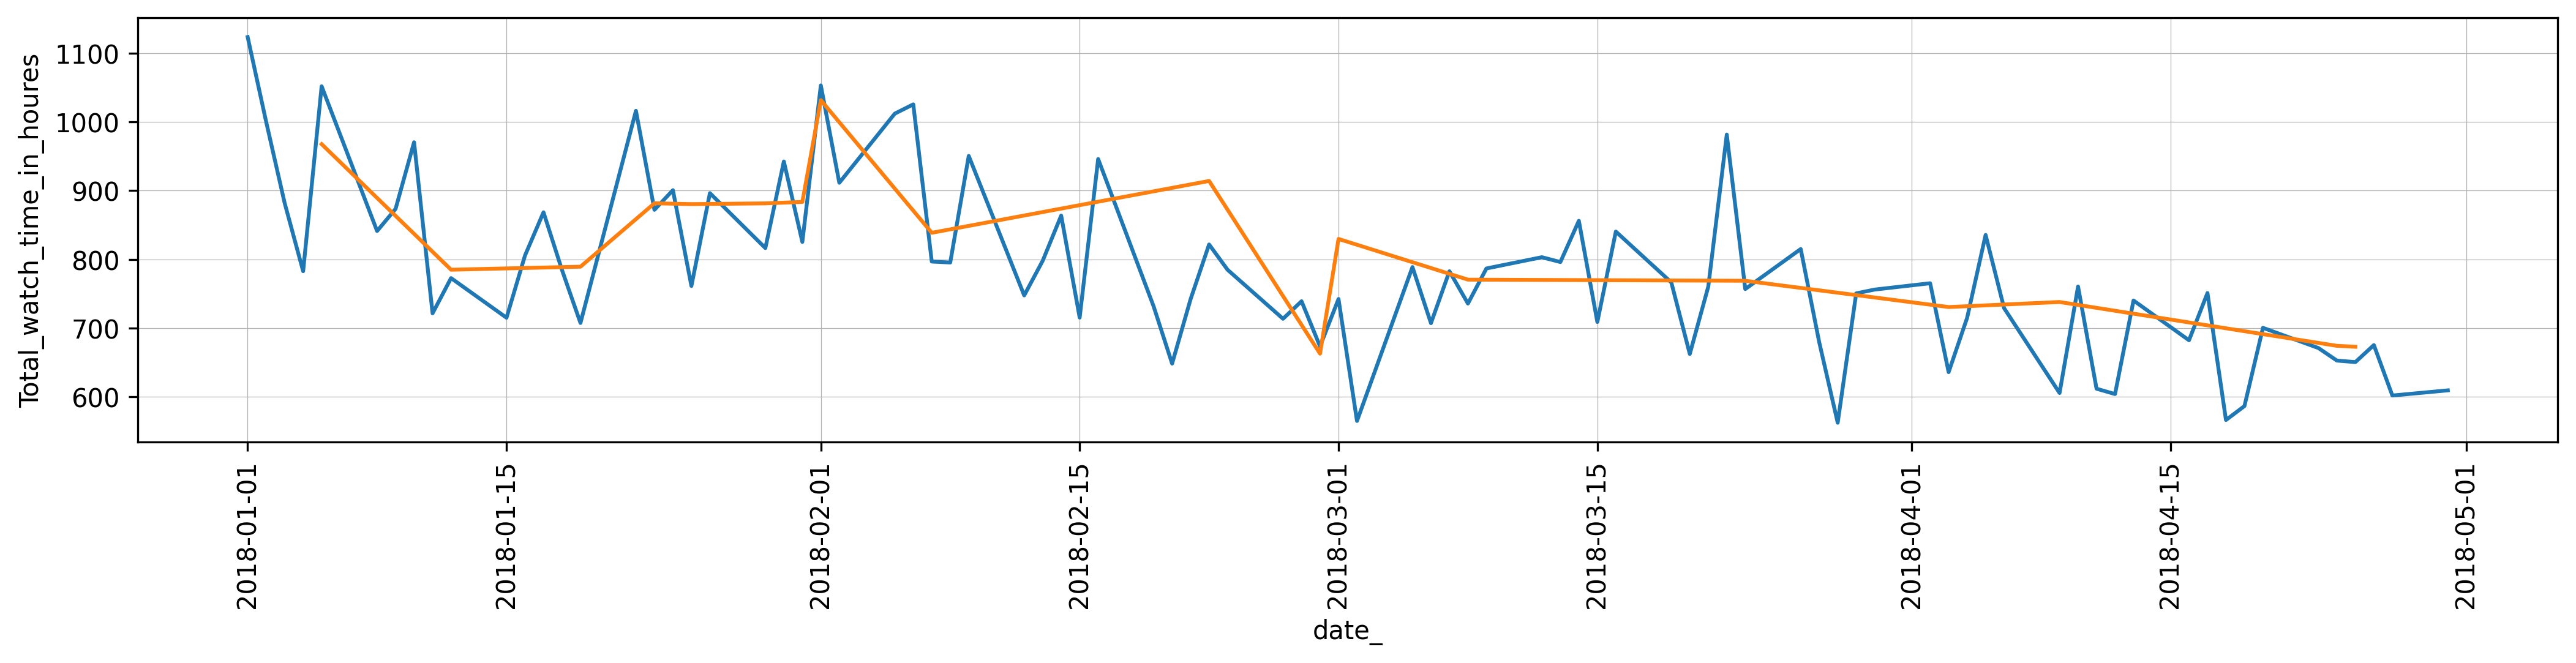

In [ ]:
plt.rcParams.update({'figure.figsize':(17,3), 'figure.dpi':300})
fig, ax=plt.subplots()
sns.lineplot(data=df, x='date_', y='Total_watch_time_in_houres')
sns.lineplot(data=pred_df, x='date_', y='y_pred')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

### **The model prediction for the next two months**

In [ ]:
import datetime

# Assuming the last available date in the dataset is stored in last_date
last_date = df['date_'].max()
next_60_days = pd.date_range(last_date + datetime.timedelta(days=1), periods=60, freq='D')
next_60_days

prediction_data=pd.DataFrame({
    'date_': next_60_days,
    'month': next_60_days.month,
    'year': next_60_days.year,
    'day': next_60_days.day,
    'season': [get_season(month) for month in next_60_days.month]  # Assuming a default season value of 0
})
prediction_data
y_pred = model.predict(prediction_data[['month', 'year', 'day', 'season']])
prediction_data['y_pred'] = y_pred
y_pred

array([674.1046 , 607.74286, 607.74286, 607.74286, 607.74286, 607.74286,
       607.74286, 607.74286, 607.74286, 607.74286, 607.74286, 607.74286,
       607.74286, 607.74286, 607.74286, 607.74286, 607.74286, 607.74286,
       607.74286, 607.74286, 607.74286, 607.74286, 607.74286, 607.74286,
       607.74286, 607.74286, 607.74286, 607.74286, 607.74286, 607.74286,
       607.74286, 674.1046 , 607.74286, 607.74286, 607.74286, 607.74286,
       607.74286, 607.74286, 607.74286, 607.74286, 607.74286, 607.74286,
       607.74286, 607.74286, 607.74286, 607.74286, 607.74286, 607.74286,
       607.74286, 607.74286, 607.74286, 607.74286, 607.74286, 607.74286,
       607.74286, 607.74286, 607.74286, 607.74286, 607.74286, 607.74286],
      dtype=float32)

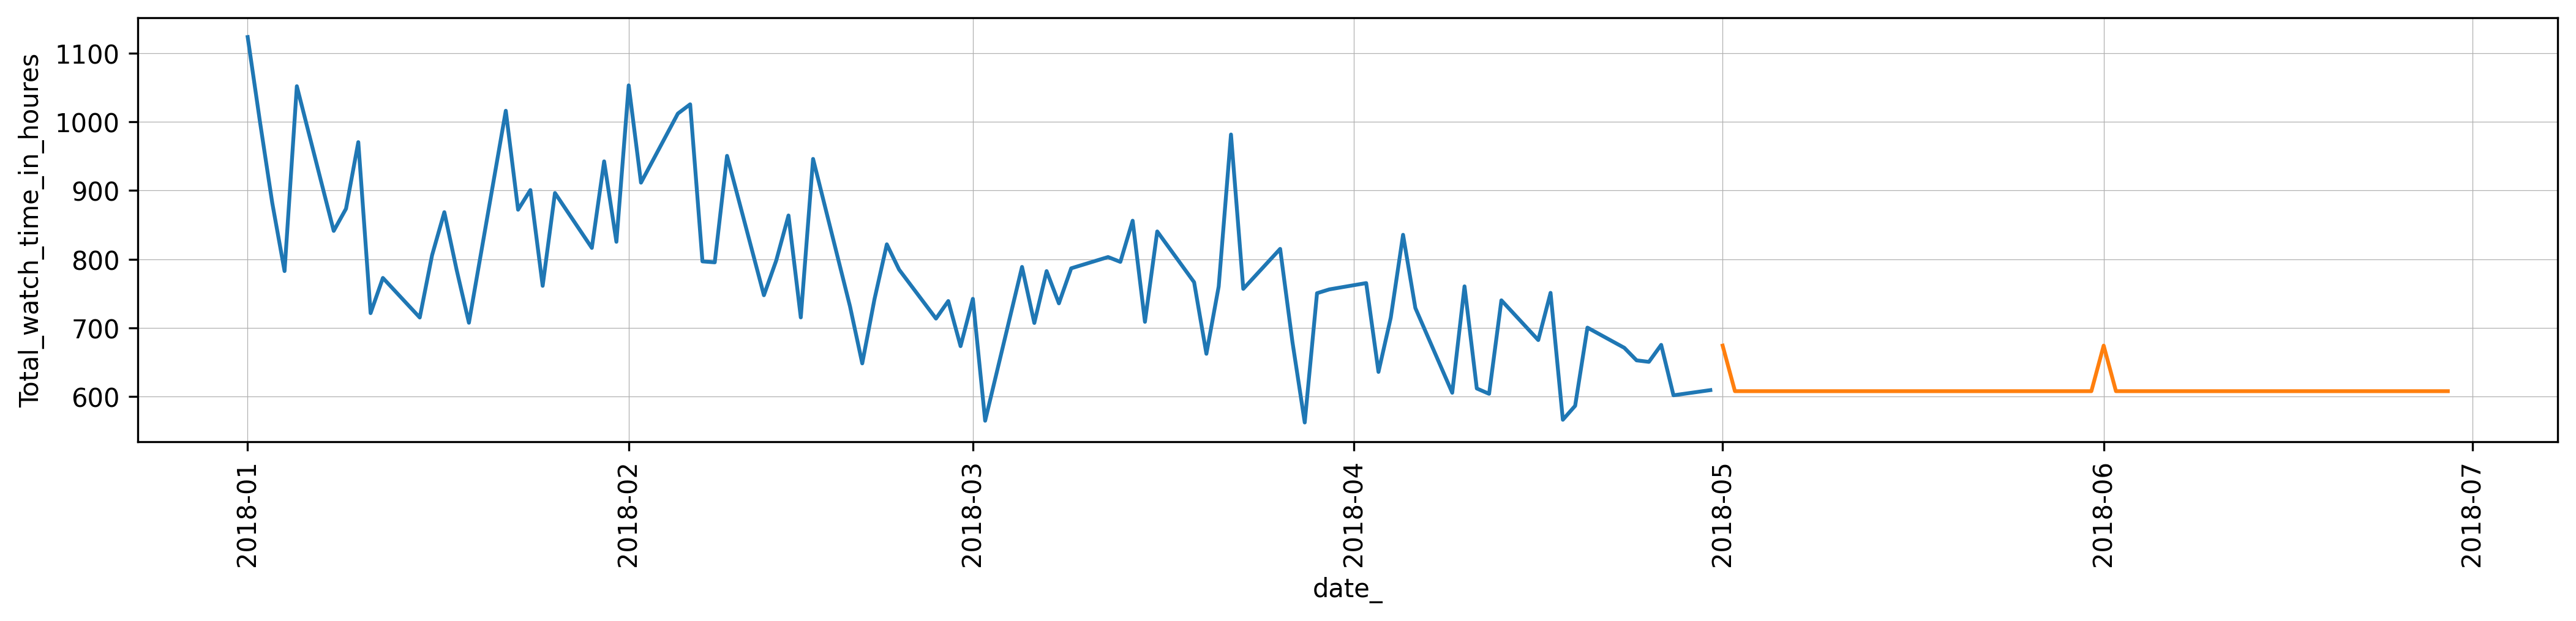

In [ ]:
plt.rcParams.update({'figure.figsize':(17,3), 'figure.dpi':300})
fig, ax=plt.subplots()
sns.lineplot(data=df, x='date_', y='Total_watch_time_in_houres')
sns.lineplot(data=prediction_data, x='date_', y='y_pred')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)